## [1]복습 및 데이터 클리닝 짚어보기
1. 데이터 불러오기 (import)
2. 처리할 데이터 찾기 (screen)
3. 나쁜 데이터의 원인 진단 (diagnose)
4. 데이터 수정 (treat)
5. 기록 (document)

## [2] 데이터 합치기 & 질문하기: 구성(composition)
1. 패널 데이터: long & wide
2. long: pd.concat <br>
핸드폰 이용률 & 소셜미디어 이용률
3. wide: pd.merge

이제 앞에서 필요한 코드들은 모두 실행하고 진행합니다.

In [1]:
from pandas import Series, DataFrame 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

print('pandas', pd.__version__) #'1.0.3'
print('matplotlib', matplotlib.__version__) # '3.2.1'
print('seaborn', sns.__version__) # '0.10.0'

pandas 1.0.5
matplotlib 3.2.2
seaborn 0.10.1


In [2]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows': 
    path = 'c:\Windows\Fonts\malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == "Linux":
    !apt -qq -y install fonts-nanum
    fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    font = font_manager.FontProperties(fname=fontpath, size=9)
    rc('font', family='NanumBarunGothic') 
    font_manager._rebuild()
else:
    print("unknown system")

In [3]:
url = "https://raw.githubusercontent.com/eunyu1031/Media_interface_2020Spr/master/data/p19_mediapanel.csv"

data = pd.read_csv(url, encoding = 'utf-8')
data.head()

,pid,hid,area,area_siz,hhld_siz,fly_typ,gender,byear,age_gr,age,...,news_med1,news_med2,news_med3,news_plat1,news_plat2,news_plat3,channel,shop,shop_dev,shop_pay
0,10001,100,1,1,3,3,1,1967,6,52,...,3,4,,3,2,,1,1,1,2
1,10002,100,1,1,3,3,2,1972,5,47,...,3,4,,3,2,,3,1,1,2
2,20001,200,1,1,3,3,1,1965,6,54,...,4,,,3,,,7,,,
3,30001,300,8,1,3,3,1,1971,5,48,...,3,,,3,,,1,,,
4,30002,300,8,1,3,3,2,1974,5,45,...,,,,,,,1,1,3,1


## [1]복습 및 데이터 클리닝 짚어보기
### 1. 데이터 불러오기(import)
- 원본 데이터의 경우 github에 저장되어 있으므로 언제든지 불러올 수 있지만, 접속이 불안정한 경우를 대비해 강의자료실에도 업로드되어 있습니다. 필요하다면 개인의 컴퓨터에 저장할 수 있습니다.
- 데이터는 comma-seperated values(csv) 형식이며, python에서는 pandas의 read_csv 함수로 가져올 수 있습니다.
- 인코딩은 utf-8입니다.
- 식별자는 pid입니다. 
- 변수의 이름은 보다 직관적인 형태로 변형된 상태입니다.

<table>
<thead>
<tr>
<td width="91">
<p>Original</p>
</td>
<td width="97">
<p>Cleaned</p>
</td>
<td width="210">
<p>Description</p>
</td>
<td>
<p>Detail</p>
</td>
</tr>
</thead>
<tbody>
<tr>
<td width="91">
<p>pid</p>
</td>
<td width="97">
<p><strong>pid</strong></p>
</td>
<td width="210">
<p>[개인정보] 개인 통합 ID</p>
</td>
<td>&nbsp;</td>
</tr>
<tr>
<td width="91">
<p>p__age</p>
</td>
<td width="97">
<p><strong>age_gr</strong></p>
</td>
<td width="210">
<p>[개인정보] 나이(리코드)</p>
</td>
<td>
<p>1) 만 10대 미만 2) 만 10-19세 3) 만 20-29세 4) 만 30-39세 <br>
    5) 만 40-49세 6) 만 50-59세 7) 만 60-69세 8) 만 70세 이상</p>
</td>
</tr>
<tr>
<td width="91">
<p>p__age1</p>
</td>
<td width="97">
<p><strong>age</strong></p>
</td>
<td width="210">
<p>[개인정보] 나이(만 연령)</p>
</td>
<td>&nbsp;</td>
</tr>
<tr>
<td width="91">
<p>p__mar</p>
</td>
<td width="97">
<p><strong>marry</strong></p>
</td>
<td width="210">
<p>[개인정보] 결혼 여부</p>
</td>
<td>
<p>① 미혼 ② 배우자 있음 ③ 사별 ④ 이혼</p>
</td>
</tr>
</tbody>
</table>

### 2. 처리할 데이터 찾기 (screen)
#### 중복 (duplicated)

사람들이 자주 이용하는 스마트 기기 애플리케이션 1, 2, 3순위를 살펴보기 위해 필요한 데이터만 가져왔습니다. 클리닝/변환이 필요한 데이터를 찾는 과정을 천천히 살펴봅시다.

In [4]:
app = data.loc[:,['pid','age_gr','gender', 'freq_app1','freq_app2','freq_app3']]
app.head()

,pid,age_gr,gender,freq_app1,freq_app2,freq_app3
0,10001,6,1,11,8,6
1,10002,5,2,11,16,18
2,20001,6,1,12,8,11
3,30001,5,1,19,8,11
4,30002,5,2,17,19,11


freq_app 변수들은 문 11-1의 응답입니다.

<img src='https://github.com/eunyu1031/Media_interface_2020Spr/blob/master/pics/description3.PNG?raw=true'/>

각 사람을 구분하는 pid가 혹시 중복되지 않았는지 살펴봅니다. 중복을 살펴보는 함수는 duplicated이며, 중복값이 있는 행에 True를 표시하는 boolean series 형태로 볼 수 있습니다. 기준을 pid로 하고 모든 중복값을 True로 표시하도록 keep = False로 넣습니다.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

In [5]:
app.duplicated(subset = 'pid', keep = False)

0        False
1        False
2        False
3        False
4        False
         ...  
10859    False
10860    False
10861    False
10862    False
10863    False
Length: 10864, dtype: bool

알아보기 어려우므로 boolean indexing으로 살펴봅니다.

In [6]:
app[app.duplicated('pid', keep = False)]

,pid,age_gr,gender,freq_app1,freq_app2,freq_app3


이미 충분히 처리가 되었기 때문에 pid는 중복되지 않았습니다. 만약 중복이 있는 경우에는 drop_duplicated 중복된 데이터를 지울 수 있습니다.

#### 자료형 문제
언뜻 보기에는 숫자로 되어 있는 것 같은데 DataFrame을 살펴보니 문자열로 저장되어 있습니다.

In [7]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        10864 non-null  int64 
 1   age_gr     10864 non-null  int64 
 2   gender     10864 non-null  int64 
 3   freq_app1  10864 non-null  object
 4   freq_app2  10864 non-null  object
 5   freq_app3  10864 non-null  object
dtypes: int64(3), object(3)
memory usage: 509.4+ KB


#### 누락된 데이터
어떤 값 때문인지 살펴보면 공백이 있습니다. 

In [8]:
app['freq_app3'].unique()

array(['6', '18', '11', ' ', '16', '3', '19', '10', '12', '8', '9', '4',
       '17', '5', '13', '1', '2', '14', '15'], dtype=object)

### 3. 나쁜 데이터의 원인 진단 (diagnose)
스마트 기기를 사용하지 않는 사람이나, 3개의 순위 중 일부에만 대답한 사람들 때문에 공백이 생긴 것으로 보입니다.

### 4. 데이터 수정(treat)
공백을 NaN으로 바꾸어 pandas의 dropna 함수를 이용해 편리하게 제거하고자 합니다.

- 변환: 문자열을 숫자로 바꾸어 저장 (to_numeric, apply)
- 클리닝: 누락된 데이터 제거 (dropna)

지난 시간에는 아래 코드처럼 한 줄로 해결했었는데, pd.to_numeric 함수와 함께 쓰인 apply와 lambda의 기능을 알아보고 넘어갑시다.

app.iloc[:, 3:6] = app.iloc[:, 3:6].apply(lambda x: pd.to_numeric(x, errors = 'coerce'))

#### pd.to_numeric

Series를 모두 숫자형으로 바꾸어 주는 함수입니다.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html

In [12]:
help(pd.to_numeric)

In [13]:
s1 = Series(['1.0', '2', -3])

pd.to_numeric(s1)

0    1.0
1    2.0
2   -3.0
dtype: float64

하지만 중간에 공백이 끼어 있는 경우, 해당 공백을 읽을 수 없다는 에러가 발생합니다. 읽을 수 없는 부분 때문에 에러가 발생했을 때, 이 부분을 모두 NaN으로 처리해주기 위해 errors 인수에 coerce를 넘기게 됩니다.

In [14]:
s2 = Series(['1.0', '2', -3, ' '])

pd.to_numeric(s2) # error

ValueError: Unable to parse string " " at position 3

In [15]:
s2 = Series(['1.0', '2', -3, ' '])

pd.to_numeric(s2, errors = 'coerce')

0    1.0
1    2.0
2   -3.0
3    NaN
dtype: float64

#### apply
위와 같은 작업을 세 개의 열, freq_app1,freq_app2,freq_app3 에 진행해 주어야 합니다. 이처럼 반복적인 연산이 필요할 때 apply를 사용하게 됩니다.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [ ]:
help(DataFrame.apply)

In [16]:
d1 = DataFrame([[4, 9, 25], [4, 9, 25], [4, 9, 25]], columns = ['A', 'B', 'C'])
d1

,A,B,C
0,4,9,25
1,4,9,25
2,4,9,25


In [17]:
d1.apply(np.sqrt)

,A,B,C
0,2.0,3.0,5.0
1,2.0,3.0,5.0
2,2.0,3.0,5.0


In [18]:
d1.loc[:, ['A', 'C']].apply(np.sqrt)

,A,C
0,2.0,5.0
1,2.0,5.0
2,2.0,5.0


하지만 정해진 함수가 아닌 다양한 작업을 진행하고 싶을 때, lambda를 사용하게 됩니다. __lambda x:__ 에서 __x__는 apply를 적용하는 DataFrame을 구성하는 각각의 열(axis = 0, default) 또는 행(axis = 1)을 가리킵니다. 

각 열에 pd.to_numeric을 적용하고 싶다면 pd.to_numeric 함수에서 Series가 들어갔던 자리에 x를 넣으면 연산이 진행됩니다.

In [19]:
d2 = DataFrame([['4', ' ', 1], [' ', '100', '25'], ['49', '9', ' ']], columns = ['a', 'b', 'c'])
d2

,a,b,c
0,4,,1
1,,100,25
2,49,9,


In [20]:
d2.apply(lambda x: pd.to_numeric(x, errors = 'coerce'))

,a,b,c
0,4.0,NaN,1.0
1,NaN,100.0,25.0
2,49.0,9.0,NaN


사람들이 자주 이용하는 스마트 기기 애플리케이션 1, 2, 3순위 데이터로 돌아옵니다. 원래 위 과정을 요약하면 아래와 같은 코드가 됩니다. 

In [21]:
app.iloc[:, 3:6] = app.iloc[:, 3:6].apply(lambda x: pd.to_numeric(x, errors = 'coerce'))
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pid        10864 non-null  int64  
 1   age_gr     10864 non-null  int64  
 2   gender     10864 non-null  int64  
 3   freq_app1  8537 non-null   float64
 4   freq_app2  8356 non-null   float64
 5   freq_app3  7984 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 509.4 KB


#### dropna

이제 dropna로 앞에서 NaN처리된 데이터를 지웁니다.

In [ ]:
help(DataFrame.dropna)

In [22]:
app = app.dropna(axis = 0)
# app.dropna(axis = 0, inplace = True) # 동일한 코드
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7984 entries, 0 to 10862
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pid        7984 non-null   int64  
 1   age_gr     7984 non-null   int64  
 2   gender     7984 non-null   int64  
 3   freq_app1  7984 non-null   float64
 4   freq_app2  7984 non-null   float64
 5   freq_app3  7984 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 436.6 KB


위에서 index를 확인해 보면 데이터는 7984명인데 10862까지 있는 걸로 나옵니다. 중간의 index가 dropna로 빠졌기 때문으로, 추가로 작업할 때 헷갈릴 수 있으므로 이럴 때에는 (1) 식별자(pid)를 새로운 index로 만들거나 (2) 인덱스를 리셋해주면 됩니다.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html

In [23]:
# (1)
app.reset_index(drop = True) # 재설정 이전의 index를 남기지 않음

,pid,age_gr,gender,freq_app1,freq_app2,freq_app3
0,10001,6,1,11.0,8.0,6.0
1,10002,5,2,11.0,16.0,18.0
2,20001,6,1,12.0,8.0,11.0
3,30001,5,1,19.0,8.0,11.0
4,30002,5,2,17.0,19.0,11.0
...,...,...,...,...,...,...
7979,118240004,2,1,3.0,16.0,19.0
7980,118240005,2,2,3.0,18.0,5.0
7981,118290001,4,2,5.0,18.0,16.0
7982,118300001,3,1,17.0,8.0,11.0


In [24]:
# (2)
app.set_index('pid')

,age_gr,gender,freq_app1,freq_app2,freq_app3
pid,,,,,
10001,6,1,11.0,8.0,6.0
10002,5,2,11.0,16.0,18.0
20001,6,1,12.0,8.0,11.0
30001,5,1,19.0,8.0,11.0
30002,5,2,17.0,19.0,11.0
...,...,...,...,...,...
118240004,2,1,3.0,16.0,19.0
118240005,2,2,3.0,18.0,5.0
118290001,4,2,5.0,18.0,16.0


In [25]:
app = app.reset_index(drop = True)

#### astype
to_numeric은 숫자로만 바꾸는 함수이지만, astype은 자료형을 지정해서 바꾸게 됩니다. NaN이 사라졌으므로 굳이 실수형으로 저장할 필요가 없이 정수형으로 바꿉니다.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

In [ ]:
help(DataFrame.astype)

In [26]:
app = app.astype('int64')
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7984 entries, 0 to 7983
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   pid        7984 non-null   int64
 1   age_gr     7984 non-null   int64
 2   gender     7984 non-null   int64
 3   freq_app1  7984 non-null   int64
 4   freq_app2  7984 non-null   int64
 5   freq_app3  7984 non-null   int64
dtypes: int64(6)
memory usage: 374.4 KB


그리고 클리닝이 마무리된 데이터에서 필요한 데이터를 조합하여 시각화 작업을 진행합니다.

In [27]:
apprank = pd.concat([app.freq_app1.value_counts().sort_index(),
                 app.freq_app2.value_counts().sort_index(),
                 app.freq_app3.value_counts().sort_index()],
                 axis = 1)

apprank['weighted_sum'] = 3*apprank['freq_app1'] + 2*apprank['freq_app1'] + 1*apprank['freq_app1']
apprank.head()

,freq_app1,freq_app2,freq_app3,weighted_sum
1,326,203,237,1956
2,72,72,57,432
3,566,509,563,3396
4,75,108,107,450
5,264,294,351,1584


Matplotlib의 틀에 Seaborn으로 그린 수평막대그래프를 넣었습니다.

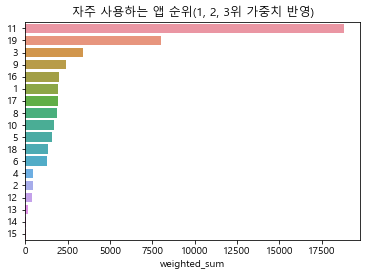

In [28]:
fig, ax = plt.subplots()

sns.barplot(x = 'weighted_sum', y = apprank.index, data = apprank,
            ci = None, 
            order = apprank['weighted_sum'].sort_values(ascending = False).index,
           orient = 'h',
           ax = ax)

ax.set_title('자주 사용하는 앱 순위(1, 2, 3위 가중치 반영)')

fig.savefig('review.png', bbox_inches = "tight")

plt.show()

### 5. 기록 (document)
Python으로 데이터 작업을 진행하면 모든 과정이 코드로 남기 때문에 같이 일하는 사람(또는 많은 경우에 미래의 자기 자신)과 소통하기 편리합니다.

## [2] 데이터 합치기 & 질문하기: 구성
### 1. 패널 데이터: long & wide
#### 패널
미디어패널 데이터는 왜 미디어 '패널' 데이터일까요?

동일한 개체(개인, 회사, 국가 등)를 시간에 따라 반복적으로 조사한 데이터를 패널 데이터(panel data)라고 합니다. 자연과학 분야에서는 종단면 데이터(longitudinal data)라고 부르기도 합니다. 개체가 반복되어 관찰되므로 시간의 흐름에 따른 변화를 짚어볼 수 있으며, 통계 분석에 있어서도 여러 이점을 제공합니다. 개체별로 데이터가 측정된 기간이 다른 경우를 불균형 패널(unbalanced panel)이라고 하며, 개체별로 데이터가 측정된 기간이 같은 경우를 균형 패널(balanced panel)이라고 합니다.

수업에서는 균형 패널을 구성하여 살펴볼 예정입니다.

#### long(가로형)-wide(세로형)
패널 데이터는 long(가로형)-wide(세로형) 두 가지 형태로 구성될 수 있습니다. 같은 개체가 여러 번 측정된 데이터를 각 시점에 따라 여러 변수로 길게 늘어놓은 것을 wide, 측정시점을 하나의 열로 가져와 하나의 변수가 여러 시점에 측정된 데이터를 가지고 있으면 long입니다.

<img src='https://github.com/eunyu1031/Media_interface_2020Spr/blob/master/pics/long_n_wide.PNG?raw=true'/>

세로통합/가로통합: https://stat.kisdi.re.kr/MediaStat/MediaPanel/Library_Detail4.aspx?MENU_ID=17

#### 데이터 합치기

미디어 패널 데이터는 연도별로 따로 제공하기 때문에 여러 연도의 자료가 필요한 경우에는 직접 합쳐야 합니다. pandas에서는 DataFrame을 합치는 함수로 merge, concat, join, append를 제공하며, 수업에서는 concat과 merge를 다룹니다.

정확한 그림은 아니지만 concat은 왼쪽처럼 여러 연도의 데이터를 붙이며, merge는 오른쪽처럼 식별자를 기준으로 여러 연도의 데이터를 잇습니다.

<img src='https://github.com/eunyu1031/Media_interface_2020Spr/blob/master/pics/merge.png?raw=true'/>


https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html



### 2. long: pd.concat

패널 데이터를 구성하기 위한 각 연도별 데이터를 읽어옵니다. 우선 2015년과 2019년 2개만 살펴봅니다.

In [29]:
url_19 = "https://raw.githubusercontent.com/eunyu1031/Media_interface_2020Spr/master/data/p19_week7.csv"
url_15 = "https://raw.githubusercontent.com/eunyu1031/Media_interface_2020Spr/master/data/p15_week7.csv"

In [30]:
data15 = pd.read_csv(url_15, encoding = 'utf-8')
data15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9873 entries, 0 to 9872
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        9873 non-null   int64 
 1   hid        9873 non-null   int64 
 2   area_siz   9873 non-null   int64 
 3   gender     9873 non-null   int64 
 4   age_gr     9873 non-null   int64 
 5   age        9873 non-null   int64 
 6   mob_use    9873 non-null   int64 
 7   sns_use    9873 non-null   int64 
 8   freq_sns1  9873 non-null   object
 9   year       9873 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 771.5+ KB


설문지가 중간에 바뀌었기 때문에 2015년도 데이터는 후속연도에도 계속 사용할 수 있는 변수가 더 적습니다.

In [31]:
data19 = pd.read_csv(url_19, encoding = 'utf-8')
data19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pid         10864 non-null  int64 
 1   hid         10864 non-null  int64 
 2   area_siz    10864 non-null  int64 
 3   gender      10864 non-null  int64 
 4   age_gr      10864 non-null  int64 
 5   age         10864 non-null  int64 
 6   mob_use     10864 non-null  int64 
 7   mob_num     10864 non-null  object
 8   mob_csp     10864 non-null  object
 9   mob_dev     10864 non-null  object
 10  c01_gr      10864 non-null  object
 11  c02_gr      10864 non-null  object
 12  c03_gr      10864 non-null  object
 13  c04_gr      10864 non-null  object
 14  c05_gr      10864 non-null  object
 15  sns_use     10864 non-null  int64 
 16  freq_sns1   10864 non-null  object
 17  news_med1   10864 non-null  object
 18  news_med2   10864 non-null  object
 19  news_med3   10864 non-null  object
 20  news_p

지난 시간부터 계속 사용하고 있는 pd.concat으로 2015년과 2019년의 데이터를 붙입니다. 다만, 열이 아니라 행으로 붙여야 하기 때문에 axis = 0으로 설정합니다. 기존의 index도 사용하지 않고 ignore_index = True로 결과 DataFrame 기준 새로 다시 설정합니다.

In [32]:
concat1519 = pd.concat([data15, data19], axis = 0, ignore_index = True)
concat1519.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20737 entries, 0 to 20736
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pid         20737 non-null  int64 
 1   hid         20737 non-null  int64 
 2   area_siz    20737 non-null  int64 
 3   gender      20737 non-null  int64 
 4   age_gr      20737 non-null  int64 
 5   age         20737 non-null  int64 
 6   mob_use     20737 non-null  int64 
 7   sns_use     20737 non-null  int64 
 8   freq_sns1   20737 non-null  object
 9   year        20737 non-null  int64 
 10  mob_num     10864 non-null  object
 11  mob_csp     10864 non-null  object
 12  mob_dev     10864 non-null  object
 13  c01_gr      10864 non-null  object
 14  c02_gr      10864 non-null  object
 15  c03_gr      10864 non-null  object
 16  c04_gr      10864 non-null  object
 17  c05_gr      10864 non-null  object
 18  news_med1   10864 non-null  object
 19  news_med2   10864 non-null  object
 20  news_m

sort_values를 사용해서 식별자와 연도로 정렬하면 long형태임을 볼 수 있습니다.

In [33]:
concat1519.sort_values(['pid', 'year'])

,pid,hid,area_siz,gender,age_gr,age,mob_use,sns_use,freq_sns1,year,...,c02_gr,c03_gr,c04_gr,c05_gr,news_med1,news_med2,news_med3,news_plat1,news_plat2,news_plat3
0,10001,100,1,1,5,48,1,2,,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9873,10001,100,1,1,6,52,1,1,15,2019,...,,1,,,3,4,,3,2,
1,10002,100,1,2,5,43,1,2,,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9874,10002,100,1,2,5,47,1,1,15,2019,...,,1,1,,3,4,,3,2,
9875,20001,200,1,1,6,54,1,1,16,2019,...,,,,,4,,,3,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20732,118290002,1182900,1,1,4,36,1,2,,2019,...,,,,,,,,,,
20733,118300001,1183000,1,1,3,24,1,1,2,2019,...,,,,,,,,,,
20734,118310001,1183100,1,2,8,80,1,2,,2019,...,,,,,,,,,,
20735,118320001,1183200,1,2,8,79,1,2,,2019,...,,,,,,,,,,


#### 중복
중복값을 검사할 때 duplicated를 pid로만 적용하면 2개년도 데이터이기 때문에 당연히 대부분 표시됩니다. pid와 연도 year까지 조건을 넣고 검사해야 한 연도에 같은 사람이 여러 명 있었는지 알 수 있습니다.

In [34]:
concat1519[concat1519.duplicated('pid', keep=False)]

,pid,hid,area_siz,gender,age_gr,age,mob_use,sns_use,freq_sns1,year,...,c02_gr,c03_gr,c04_gr,c05_gr,news_med1,news_med2,news_med3,news_plat1,news_plat2,news_plat3
0,10001,100,1,1,5,48,1,2,,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10002,100,1,2,5,43,1,2,,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30001,300,1,1,5,44,1,2,,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30002,300,1,2,5,41,1,1,16,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,30003,300,1,1,2,13,1,2,,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18296,71640001,716400,1,1,6,59,1,2,,2019,...,,,,,,,,,,
18297,71660001,716600,1,1,6,51,1,1,2,2019,...,,,,,3,2,1,3,3,1
18298,71660002,716600,1,2,5,48,1,2,,2019,...,,,,,,,,,,
18299,71660003,716600,1,1,3,22,1,2,,2019,...,,,,,4,,,3,,


중복이 없는 것을 확인할 수 있습니다.

In [35]:
concat1519[concat1519.duplicated(['pid', 'year'], keep=False)]

,pid,hid,area_siz,gender,age_gr,age,mob_use,sns_use,freq_sns1,year,...,c02_gr,c03_gr,c04_gr,c05_gr,news_med1,news_med2,news_med3,news_plat1,news_plat2,news_plat3


<p style="color:#0000FF";><font size = "5"><b>
 # 연습하기
    </b></font></p>

균형 패널을 구성하여 살펴보고자 합니다. 함수 duplicated를 이용하여 한 개를 초과하여 존재하는 pid를 concat2y에 저장하고, sort_values와 reset_index를 사용해서 아래와 같은 기본정보와 틀을 갖춘 DataFrame을 만드세요.

### 질문하기: 구성

연도별로 휴대폰 이용률과 소셜 미디어 이용률은 어떻게 변화했을까요?
<table>
<thead>
<tr>
<td width="82">
<p>Original</p>
</td>
<td width="83">
<p>Cleaned</p>
</td>
<td>
<p>[방송통신 서비스 가입 및 지출] 온라인 디지털 콘텐츠 지출</p>
</td>
</tr>
</thead>
<tbody>
<tr>
<td width="82">
<p>p__a01001</p>
</td>
<td width="83">
<p><strong>mob_use</strong></p>
</td>
<td>
<p>[휴대폰 이용현황] 이용여부 ①있다 ②없다</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__d11001</p>
</td>
<td width="83">
<p><strong>sns_use</strong></p>
</td>
<td>
<p>[미디어 이용행태] SNS 사용 여부 ①사용한다 ②사용하지 않는다</p>
</td>
</tr>
<tr>
<td width="82">
<p>p__d11002</p>
</td>
<td width="83">
<p><strong>freq_sns1</strong></p>
</td>
<td>
<p>[미디어 이용행태] 주로 사용하는 SNS 계정 1순위
1. 트위터 (Twitter) 2. 페이스북 (Facebook) 3. 싸이월드 미니홈피 12. 카카오스토리 13. 기타 15. 인스타그램(instagram) 16. 네이버 밴드 20. 비트윈 21. 웨이보 22. 핀터레스트 23. 유튜브 9999. 모름/무응답</p>
</td>
</tr>
</tbody>
</table>

위 연습에서 만든 데이터로 파이 차트와 도넛 차트, 기울기 차트를 그려보고자 합니다. 

#### DataFrame.replace
휴대폰 이용률을 살펴보기 전에, replace를 사용해서 1/2를 1/0으로 바꿉니다. 이전에 사용했던 str.replace와 비슷하나, 문자열이 아닌 다른 자료형에도 더 넓게 적용할 수 있습니다.

In [ ]:
help(DataFrame.replace)

In [41]:
concat2y['mob_use'].replace(2, 0, inplace = True)
concat2y['mob_use'].value_counts()

1    14052
0      852
Name: mob_use, dtype: int64

2019년도 휴대폰 이용현황 먼저 살펴봅시다. 파이 차트를 그리려면 비율 데이터가 필요하고, value_counts로 구할 수 있습니다

In [42]:
concat2y[concat2y['year']==2019]['mob_use'].value_counts(normalize = True)

1    0.963634
0    0.036366
Name: mob_use, dtype: float64

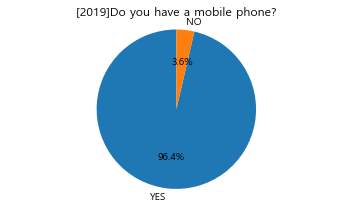

In [43]:
fig, ax = plt.subplots(figsize = (5, 3))

labels = ['YES', 'NO']

ax.pie(concat2y[concat2y['year']==2019]['mob_use'].value_counts(normalize = True), 
       labels = labels, 
       autopct = '%1.1f%%', # 숫자 표시방법
      startangle = 90) # 시작하는 각도

ax.set(title = "[2019]Do you have a mobile phone?")

ax.axis('equal') # 찌그러지지 않은 원
plt.tight_layout() # default layout

plt.show()

도넛 차트는 파이 차트 중간에 흰 원을 하나 그려 넣으면 됩니다.

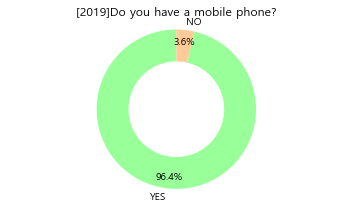

In [44]:
fig, ax = plt.subplots(figsize = (5, 3))

labels = ['YES', 'NO']

ax.pie(concat2y[concat2y['year']==2019]['mob_use'].value_counts(normalize = True), 
       labels = labels, 
       autopct = '%1.1f%%',
        pctdistance=0.85, # 중심으로부터의 거리
      startangle = 90, 
       colors = ['#99ff99','#ffcc99']) # 색깔 지정

ax.set(title = "[2019]Do you have a mobile phone?")

# 흰 원 그리기
ax.add_artist(plt.Circle((0,0),0.60,fc='white'))

ax.axis('equal')  
plt.tight_layout()

plt.show()

<p style="color:#0000FF";><font size = "5"><b>
 # 연습하기
    </b></font></p>

- 소셜 미디어 이용률 변화 살펴보기<br>
sns_use 변수를 사용하고, 2를 0으로 바꾸는 것을 잊지 않도록 합니다.
- 도넛 차트로 그리기 <br>
여러 수치들을 조정해가며 마음에 드는 차트를 그려보세요.
- 2015년도와 2019년도를 하나의 figure에 같이 그리기 <br>
subplot안에 axes 2개가 들어갈 자리를 만들어야 합니다. Week6을 참고합시다.

파이/도넛 차트는 비교하기가 어렵다는 단점이 있습니다. 이를 보완하기 위한 기울기 차트를 소개합니다.

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5))

sns.set_style("white") 
sns.set_context("notebook") 

sns.pointplot(x ='year', 
              y = 'mob_use', 
              hue = 'mob_use',
              data = concat2y,
             estimator = lambda x:len(x)*100.0/concat2y['pid'].nunique(),
             ax = ax, ci = None)

ax.set(title = "Do you have a mobile phone?",
      ylabel = "Mobile phone use(%)",
      ylim = (0, 100))

# 축을 투명하게
ax.spines['top'].set_color('#ffffff')
ax.spines['right'].set_color('#ffffff')
ax.spines['bottom'].set_color('#ffffff')
ax.spines['left'].set_color('#ffffff')

# 수직 그리드 그리기
ax.xaxis.grid(True)

plt.show()

<p style="color:#0000FF";><font size = "5"><b>
 # 연습하기
    </b></font></p>
    
2015년-2019년 소셜 미디어 이용률을 기울기 차트로 그려 비교해 보세요.

기울기 차트는 여러 범주를 그려야 할 때 보다 직관적입니다.

In [ ]:
concat2y['freq_sns1'] = pd.to_numeric(concat2y['freq_sns1'], errors = 'coerce').replace(9999, np.nan)

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5))

sns.set_style("white") 
sns.set_context("notebook") 

sns.pointplot(x ='year', 
              y = 'freq_sns1', 
              hue = 'freq_sns1',
              data = concat2y,
             estimator = lambda x:len(x)*100.0/concat2y.groupby('year').count()['freq_sns1'].iloc[1],
             ax = ax, 
              ci = None, 
              legend = False, 
             palette = 'Paired')

ax.set(title = "Social media service(%)",
      ylim = (0, 55))

ax.spines['top'].set_color('#ffffff')
ax.spines['right'].set_color('#ffffff')
ax.spines['bottom'].set_color('#ffffff')
ax.spines['left'].set_color('#ffffff')

ax.xaxis.grid(True)

ax.legend(edgecolor = '#ffffff', framealpha = 0)

plt.show()

# 카카오스토리의 하락세, 페이스북의 성장세, 
# 인스타그램의 급성장과 네이버밴드의 성장세, 
# 트위터의 하락세, 유튜브는 2019년에만 조사

### 3. wide: pd.merge

Merge는 기준이 되는 열(들)을 사용해 여러 데이터를 합칩니다.

In [ ]:
help(pd.merge)

merge(left DataFrame, right DataFrame, how = 'inner'(default), on= 기준이 되는 열) 순입니다. 

- merge로는 두 개의 DataFrame를 합칠 수 있으며, right가 left에 합쳐임
- on: 기준이 되는 열(들), 주로 식별자
- how: 식별자를 사용하되 두 DataFrame에서 어떻게 비교할 것인지 결정. 기본인 inner의 경우는 left, right의 교지집합, outer는 합집합, left/right는 각각의 DataFrame에 있는 식별자만 비교
- suffixes 이름이 겹치는 열이 있을 때 뒤에 구분하기 위한 문자열을 붙이게 되는데, 바꾸고 싶으면 두 개의 문자열을 튜플로 넣음

In [47]:
temp = pd.merge(data15, data19, how = 'inner',
                          on = 'pid', suffixes= ('2015', '2019'))

temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7452 entries, 0 to 7451
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pid            7452 non-null   int64 
 1   hid2015        7452 non-null   int64 
 2   area_siz2015   7452 non-null   int64 
 3   gender2015     7452 non-null   int64 
 4   age_gr2015     7452 non-null   int64 
 5   age2015        7452 non-null   int64 
 6   mob_use2015    7452 non-null   int64 
 7   sns_use2015    7452 non-null   int64 
 8   freq_sns12015  7452 non-null   object
 9   year2015       7452 non-null   int64 
 10  hid2019        7452 non-null   int64 
 11  area_siz2019   7452 non-null   int64 
 12  gender2019     7452 non-null   int64 
 13  age_gr2019     7452 non-null   int64 
 14  age2019        7452 non-null   int64 
 15  mob_use2019    7452 non-null   int64 
 16  mob_num        7452 non-null   object
 17  mob_csp        7452 non-null   object
 18  mob_dev        7452 non-null

겹치지 않는 열의 경우 뒤에 숫자가 붙지 않았습니다.

중복은 pid 하나로만 검사해도 충분합니다.

In [48]:
temp[temp.duplicated('pid', keep = False)]

,pid,hid2015,area_siz2015,gender2015,age_gr2015,age2015,mob_use2015,sns_use2015,freq_sns12015,year2015,...,c05_gr,sns_use2019,freq_sns12019,news_med1,news_med2,news_med3,news_plat1,news_plat2,news_plat3,year2019


## 연습하기

2016년부터 2019년까지 4년치 데이터를 merge해 봅니다. 
- 한 번에 두 개씩 합칠 수 있으므로 세 번 merge해야 합니다.
- 각 연도를 구분할 수 있도록 적절한 suffixes를 붙이세요.
- 중복이 있는지 검사하세요.
- merge한 결과는 utf-8 인코딩한 csv 파일로 저장하세요.

In [49]:
url_19 = "https://raw.githubusercontent.com/eunyu1031/Media_interface_2020Spr/master/data/p19_week7.csv"
url_18 = "https://raw.githubusercontent.com/eunyu1031/Media_interface_2020Spr/master/data/p18_week7.csv"
url_17 = "https://raw.githubusercontent.com/eunyu1031/Media_interface_2020Spr/master/data/p17_week7.csv"
url_16 = "https://raw.githubusercontent.com/eunyu1031/Media_interface_2020Spr/master/data/p16_week7.csv"

연습을 마무리하고 나면 wide가 long으로 바뀌는지 'merge3'부분만 본인의 변수 이름으로 바꾸어 결과를 살펴봅시다.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html

In [1]:
merge_long = pd.wide_to_long(merge3, 
                             ['hid','area_siz',
                              'gender','age_gr','age',
                              'mob_use','mob_num','mob_csp','mob_dev',
                              'c01_gr','c02_gr','c03_gr','c04_gr','c05_gr',
                              'sns_use','freq_sns1',
                              'news_med1','news_med2','news_med3',
                              'news_plat1','news_plat2','news_plat3'], 
                             i = 'pid', j = 'year').sort_values(['pid', 'year'])

merge_long.head(10)

NameError: name 'pd' is not defined